In [1]:
import numpy as np
import matplotlib.pyplot as plt
import hdbscan
import umap
import os
import time
%matplotlib inline

from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

In [2]:
### PCs over time:
file = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20210130_superv_depth_correction/20210214_temporal.npy'
temporal = np.load(file)
temporal.shape #time by pc

(30456, 1000)

In [128]:
file = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20190101_walking_dataset/fly_100/func_0/pca/20201002_on_high_pass_masked/loadings_(temporal).npy'
temporal = np.load(file)
temporal.shape #time by pc

(3384, 3384)

In [145]:
num_pcs = 5
n_neighbors = 60

print(f'{num_pcs}')
t0 = time.time()
reducer = umap.UMAP(n_neighbors=n_neighbors, min_dist=0,n_components=2)
X = reducer.fit_transform(temporal[300:-1000,:num_pcs])
print('Duration: {}'.format(time.time()-t0))

5
Duration: 8.666008234024048


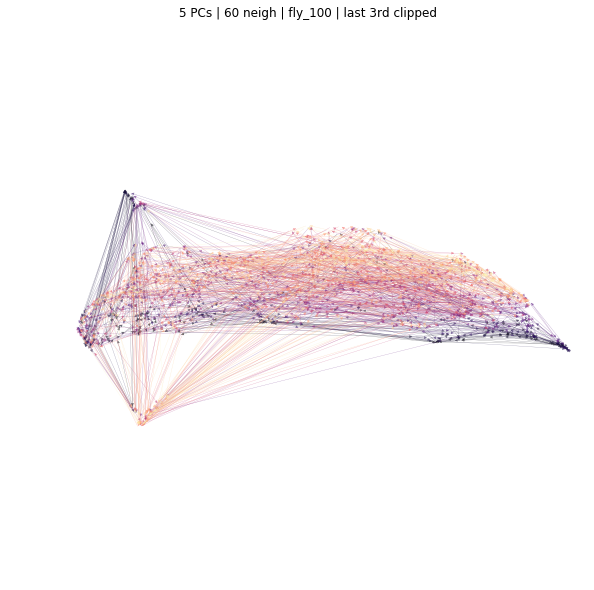

In [146]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111,)
cmap = plt.cm.magma
for i in range(X.shape[0]-1):
    alpha = .5
    color = cmap(float(i+1) / float(X.shape[0]))
    a = FancyArrowPatch(X[i,:],X[i+1,:],
                        mutation_scale=6,lw=0.25,arrowstyle="-|>",
                        color=color,alpha=alpha)
    ax.add_artist(a)
window = 8
center = np.mean(X,axis=0)
ax.set_xlim(center[0]-window,center[0]+window)
ax.set_ylim(center[1]-window,center[1]+window)
plt.axis('off')

plt.title(F'{num_pcs} PCs | {n_neighbors} neigh | fly_100 | last 3rd clipped')
save_path = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/figs'
timestr = time.strftime("%Y%m%d-%H%M%S")
fname = os.path.join(save_path, '{}.png'.format(timestr))
plt.savefig(fname,dpi=300,bbox_inches='tight')

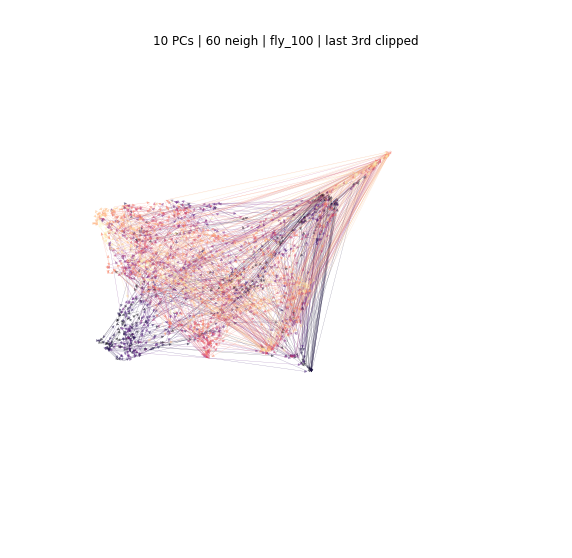

In [143]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111,projection='3d')
cmap = plt.cm.magma
for i in range(X.shape[0]-1):
    alpha = .5
    color = cmap(float(i+1) / float(X.shape[0]))
    a = Arrow3D(X[i:i+2,0],X[i:i+2,1],X[i:i+2,2],
                mutation_scale=6,lw=0.25,arrowstyle="-|>",
                color=color,alpha=alpha)
    ax.add_artist(a)
# window = 8
# center = np.mean(X,axis=0)
# ax.set_xlim(center[0]-window,center[0]+window)
# ax.set_ylim(center[1]-window,center[1]+window)

zoom = 3
ax.set_ylim(-zoom,zoom)
ax.set_xlim(-zoom,zoom)
ax.set_zlim(-zoom,zoom)
ax.margins(x=0, y=0)
plt.axis('off')
ax.view_init(0,90)

plt.title(F'{num_pcs} PCs | {n_neighbors} neigh | fly_100 | last 3rd clipped')
save_path = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/figs'
timestr = time.strftime("%Y%m%d-%H%M%S")
fname = os.path.join(save_path, '{}.png'.format(timestr))
#plt.savefig(fname,dpi=300,bbox_inches='tight')

In [74]:
fly = 19
root_directory = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20190101_walking_dataset/'
directory = os.path.join(root_directory, 'fly_{}'.format(fly), 'func_0')
t0 = time.time()
save_file = os.path.join(directory, 'pca', 'loadings_(temporal).npy')
pca_loadings = np.load(save_file)
print('Duration: {}'.format(time.time()-t0))

Duration: 0.2767157554626465


In [75]:
pca_loadings.shape

(4554, 4554)

In [78]:
num_pcs = 10
n_neighbors = 60

print(f'{num_pcs}')
t0 = time.time()
reducer = umap.UMAP(n_neighbors=n_neighbors, min_dist=0, n_components=2)
X = reducer.fit_transform(pca_loadings[:,:num_pcs])
print('Duration: {}'.format(time.time()-t0))

10


/home/users/brezovec/.local/lib/python3.6/site-packages/numba/typed_passes.py:271: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../.local/lib/python3.6/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))


Duration: 22.109097003936768


(-12.300846815109253,
 7.699153184890747,
 -7.072266578674316,
 12.927733421325684)

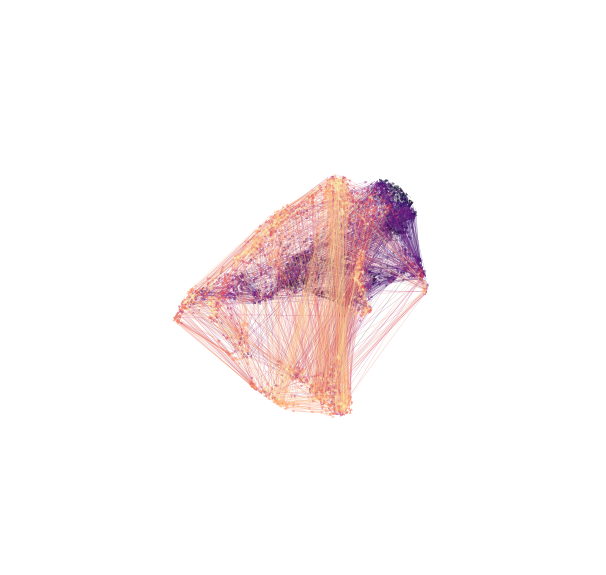

In [77]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
cmap = plt.cm.magma
for i in range(X.shape[0]-1):
    alpha = .5
    color = cmap(float(i+1) / float(X.shape[0]))
    a = FancyArrowPatch(X[i,:],X[i+1,:],
                        mutation_scale=6,lw=0.25,arrowstyle="-|>",
                        color=color,alpha=alpha)
    ax.add_artist(a)
window = 10
center = np.mean(X,axis=0)
ax.set_xlim(center[0]-window,center[0]+window)
ax.set_ylim(center[1]-window,center[1]+window)
plt.axis('off')

(-15.554651587154703,
 14.197992651607827,
 -12.093424578920018,
 15.103030940309178)

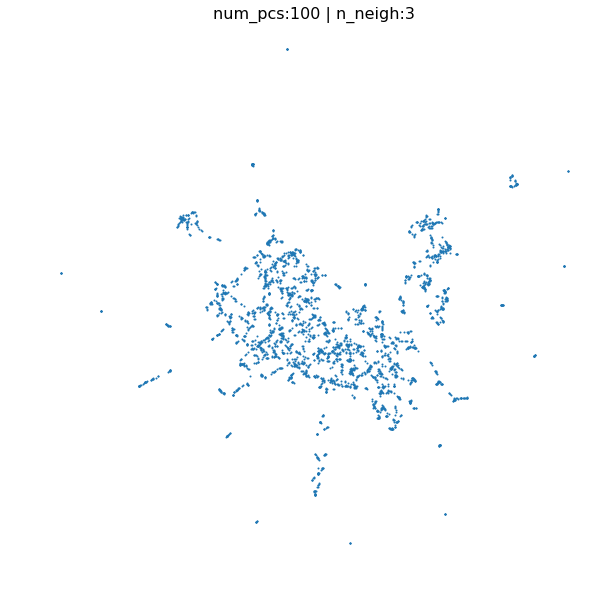

In [44]:
plt.figure(figsize=(10,10))
plt.scatter(embedding[:,0], embedding[:,1], s=1)
plt.title(F'num_pcs:{num_pcs} | n_neigh:{n_neighbors}',fontsize=16)
plt.axis('off')

(-15.554651587154703,
 14.197992651607827,
 -12.093424578920018,
 15.103030940309178)

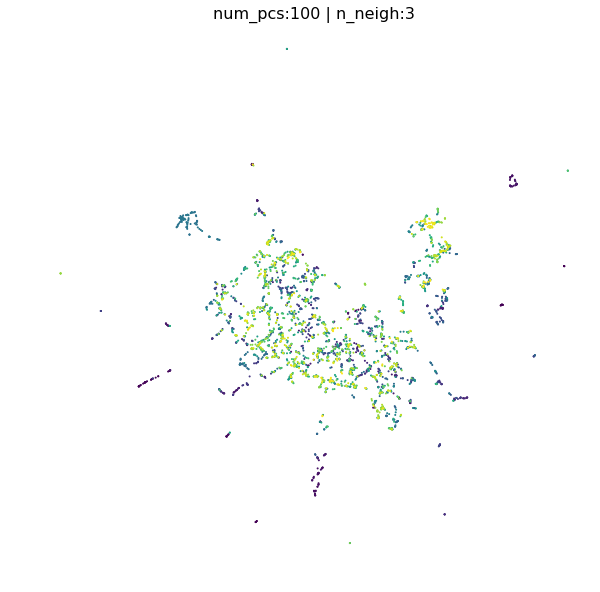

In [41]:
plt.figure(figsize=(10,10))
plt.scatter(embedding[:,0], embedding[:,1], s=1, c=list(range(3384)))
plt.title(F'num_pcs:{num_pcs} | n_neigh:{n_neighbors}',fontsize=16)
plt.axis('off')

In [ ]:
flies = [1,3,5,7,19,21,48,51,54,68]

for fly in flies:
    directory = os.path.join(root_directory, 'fly_{}'.format(fly), 'func_0')
    t0 = time.time()
    save_file = os.path.join(directory, 'pca', 'loadings_(temporal).npy')
    pca_loadings = np.load(save_file)
    print('Duration: {}'.format(time.time()-t0))

    t0 = time.time()
    reducer = umap.UMAP(n_neighbors=60,min_dist=0,n_components=2)
    X = reducer.fit_transform(pca_loadings[:,:10])
    print('Duration: {}'.format(time.time()-t0))

    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    cmap = plt.cm.magma
    for i in range(X.shape[0]-1):
        alpha = .5
        color = cmap(float(i+1) / float(X.shape[0]))
        a = FancyArrowPatch(X[i,:],X[i+1,:],
                            mutation_scale=6,lw=0.25,arrowstyle="-|>",
                            color=color,alpha=alpha)
        ax.add_artist(a)
    window = 6
    center = np.mean(X,axis=0)
    ax.set_xlim(center[0]-window,center[0]+window)
    ax.set_ylim(center[1]-window,center[1]+window)
    plt.axis('off')
    save_path = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/figs'
    timestr = time.strftime("%Y%m%d-%H%M%S")
    fname = os.path.join(save_path, '{}_{}.png'.format(timestr,fly))
    plt.savefig(fname,dpi=300,bbox_inches='tight')